## Problem Statement

### A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
### They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal
#### We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading the data

In [2]:
## Reading the data
df = pd.read_csv('day.csv')

#### Checking some records

In [3]:
# Checking the shape and top 5 rows of the data
print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Checking last 5 rows

In [4]:
# Checking last 5 rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


#### Checking the information about the data

In [5]:
# Chekcing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### All values are present in the dataset as there is no null values for any column

#### Checking the descriptive statistics of the data

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### The columns __yr__, __holiday__ and __workingda__ are having min values as __0__ and max values as __1__, we will keep these in a variable named __binary_vars__

In [7]:
## Assigning binary variables
binary_vars = ['yr', 'holiday', 'workingday']

#### Checking for binary variables

In [8]:
## Checking data for binary variables
df[binary_vars]

,yr,holiday,workingday
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
725,1,0,1
726,1,0,1
727,1,0,0
728,1,0,0


#### Let's take a look again at the dataset, this time at the tail

In [9]:
# Checking last 5 records
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


#### The first column is __instant__
#### It is having incremental values starting from 1 and its max value is equal to the number of records, let's cross check

In [10]:
### Checking if length of the records in the instant column is equal to the lengthh of index
len(df.instant) == len(df.index)

True

#### It makes sense to drop this column

In [11]:
# Drpopping the instant column
df = df.drop('instant',axis = 1)

#### Taking a look at the data again

In [12]:
# Checking top 5 records
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Let's check the __dteday__ column now

In [13]:
## Checking for minimum value
df.dteday.min()

'01-01-2018'

In [14]:
## Checking for maximum value
df.dteday.max()

'31-12-2019'

#### It means that our data belongs from 1st date of year 2018 to the last date of 2019. So, it has 365*2 = 730 records in total, without a missing value for any data

#### As we have to predict the count of total rental bikes, the __dteday__ column is not useful for us right now,
#### Also it is not giving any extra information because the year, month and working day is covered by columnns __yr__, __month__  and __workingday__ already

In [15]:
## Dropping the dteday column
df = df.drop('dteday', axis = 1)

#### Checking the df again

In [16]:
# Checking the dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### The column __cnt__ seems to be the sum of casual and registered, let's check if it is true

In [17]:
# Checking if casual count + registered count = count of cnt
all(df.casual + df.registered == df.cnt)

True

#### Since all the values in __cnt__ are the sum of values in __casual__ and __registered__ columns and we can predict either of the __casual__, __residual__ and __cnt__ at a time
#### Also the __casual__ and __registered__ counts are apparently counted after the count is known, its safe to drop these columns too

In [18]:
# Dropping the casual and registered columns
df = df.drop(['casual','registered'], axis = 1)

#### Checking the dataframe again

In [19]:
# Checking dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Let's take categorical columns together to identify their behaviours

In [20]:
# Assigning categorical variables in a dataframe
cat_vars = ['season','mnth','weekday','weathersit']

#### Checking the data correspoding to __cat_vars__

In [21]:
# Checking the data
df[cat_vars]

,season,mnth,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1
...,...,...,...,...
725,1,12,4,2
726,1,12,5,2
727,1,12,6,2
728,1,12,0,1


#### Taking a look at columns

In [22]:
## taking a look at columns
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Let's take numerical columns together to identify their behaviours

#### Checking the data corresponding to numeric variables

#### Taking the columns which are neither binary type nor categorical in a dataframe 

In [23]:
## Assigning the data for numeric type columns in a varaible
df_numeric = df[df[df.columns.difference(cat_vars)].columns.difference(binary_vars)]

In [24]:
# Chekcing the data
df_numeric

,atemp,cnt,hum,temp,windspeed
0,18.18125,985,80.5833,14.110847,10.749882
1,17.68695,801,69.6087,14.902598,16.652113
2,9.47025,1349,43.7273,8.050924,16.636703
3,10.60610,1562,59.0435,8.200000,10.739832
4,11.46350,1600,43.6957,9.305237,12.522300
...,...,...,...,...,...
725,11.33210,2114,65.2917,10.420847,23.458911
726,12.75230,3095,59.0000,10.386653,10.416557
727,12.12000,1341,75.2917,10.386653,8.333661
728,11.58500,1796,48.3333,10.489153,23.500518


#### We can check the collinearity in the data by checking the correlation matrix and the heatmap

#### Let's check for correlation matrix for these by drawing a heatmap

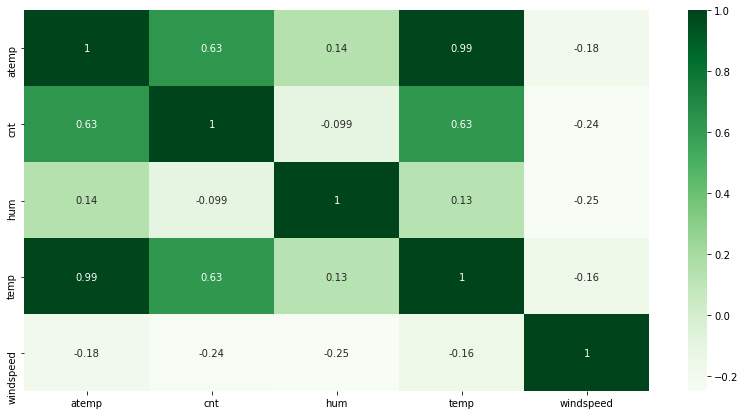

In [25]:
# Drawing the heatmap
plt.figure(figsize = (14,7))
sns.heatmap(df_numeric.corr(), annot = True, cmap = 'Greens')
plt.show()

#### The columns __temp__ and __atemp__ are coming out to be highly correlated with each other as well as with cnt and it also makes sense as one is the recorded temperature and one is the feeling temperature.
#### We can drop one of these, we wiill drop the __atemp__ column from our original dataset

In [26]:
### Dropping the atemp column
df = df.drop('atemp', axis = 1)

#### Checking the dataframe again

In [27]:
# Checking the top 5 records
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Checking the data types of all the columns

In [28]:
# Checking the data type
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Visualizing the data

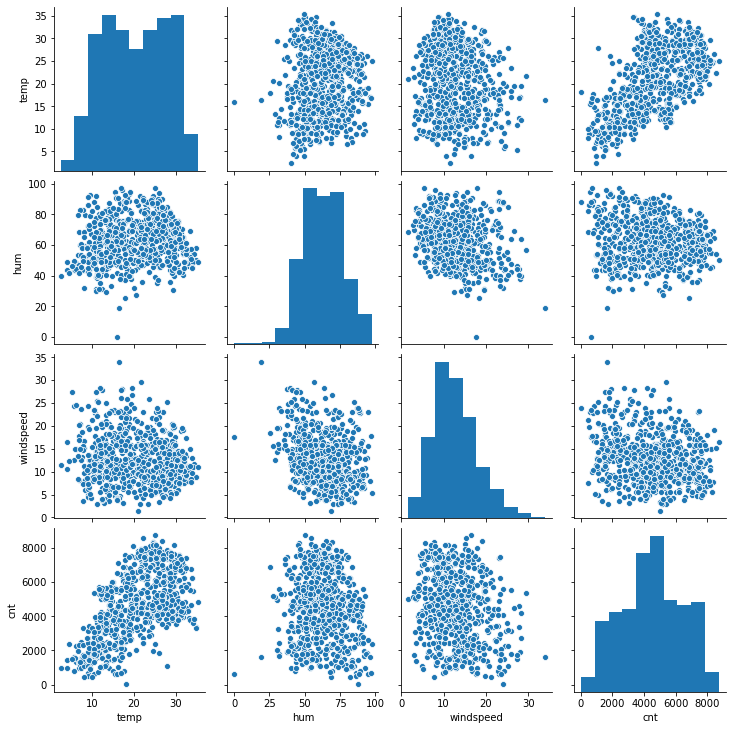

In [29]:
# Visualizing the numeric variables
sns.pairplot(df.loc[:,'temp':'cnt'])
plt.show()

## Step 2: Outlier Analysis

#### Let's check for the outliers in the numerical columns

#### Since we will need to detect and remove outliers, let's cerate a function that will give us the boundry values so that we can remove values beyond boundry

In [30]:
### Function to get boundries for outlier detection
def get_boundries(data, column):
    p_25 = np.percentile(data[column],25)
    p_75 = np.percentile(data[column],75)
    
    ## Inter-quartile range
    iqr = p_75 - p_25

    l_limit = round(p_25 - 1.5 * iqr)
    u_limit = round(p_75 + 1.5 * iqr)
    return (l_limit, u_limit)

#### Checking the __temp__ column

#### Let's check the __temp__ by drawing a boxplot

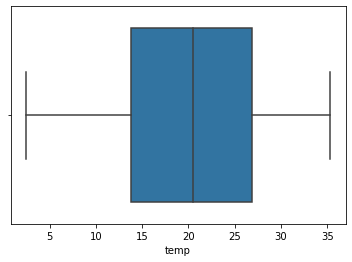

In [31]:
## Drawing the boxplot
sns.boxplot(df_numeric.temp)
plt.show()

#### Let's get boundries for outliers

In [32]:
## Finding lower and upper fence for outlers in temp column
lower_temp , upper_temp = get_boundries(df,'temp')

In [33]:
## Printing the values
print(lower_temp)
print(upper_temp)

-6.0
46.0


In [34]:
# Checking statistics for temp column
df_numeric.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

#### There is no outlier in __temp__, as evident from the boxplot and data

#### Checking for __hum__ column

#### Let's check the __hum__ by drawing a boxplot

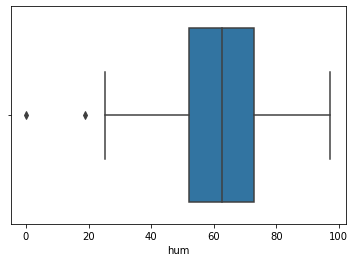

In [35]:
# Drawing the boxplot
sns.boxplot(df.hum)
plt.show()

#### Let's get boundries for outliers

In [36]:
## Finding lower and upper fence for outlers in hum column
lower_hum , upper_hum = get_boundries(df,'hum')

In [37]:
# Printing the values
print(lower_hum)
print(upper_hum)

21.0
104.0


In [38]:
# Checking for hum column
df_numeric.hum.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1])

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
5%        40.741735
10%       45.000000
25%       52.000000
50%       62.625000
75%       72.989575
90%       81.762500
95%       86.868735
100%      97.250000
max       97.250000
Name: hum, dtype: float64

#### Visually we can see that there are outliers beyond the lower fence

In [39]:
## Checking outlier values
df[df.hum < 21]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
49,1,0,2,0,6,0,1,16.365847,18.7917,34.000021,1635
68,1,0,3,0,4,1,3,15.952731,0.0000,17.545759,623


#### The values are too low than other values, we can cap these values at 5% (40.74)

#### Capping the values at 5%

In [40]:
# Taking the 5th percentile in a variable
per_5_hum = round(df.hum.quantile(0.05),4)

#### We can replace the outliers with 5th percentile value to treat the outliers in __hum__

In [41]:
### Assigning nan to outlier values
df.loc[df.hum < 21, 'hum'] = np.nan

In [42]:
# Replacing above avalues with 5th percentile
df.fillna(per_5_hum,inplace=True)

In [43]:
## Cross checking the records
df.loc[[49,68]]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
49,1,0,2,0,6,0,1,16.365847,40.7417,34.000021,1635
68,1,0,3,0,4,1,3,15.952731,40.7417,17.545759,623


#### Checking for __windspeed__ column

#### Let's check by drawing a boxplot

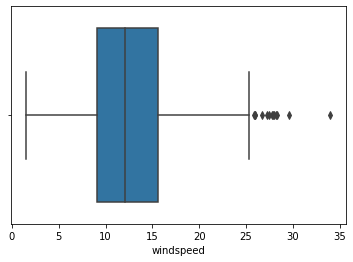

In [44]:
# Drawing the boxplot
sns.boxplot(df.windspeed)
plt.show()

#### Let's get boundries for outliers

In [45]:
## Finding lower and upper fence for outlers in windspeed column
lower_wind , upper_wind = get_boundries(df,'windspeed')

In [46]:
# Printing the values
print(lower_wind)
print(upper_wind)

-1.0
26.0


In [47]:
# Checking for windspeed column
df_numeric.windspeed.describe(percentiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1])

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
5%         5.326052
10%        6.704754
25%        9.041650
50%       12.125325
75%       15.625589
90%       19.833997
95%       22.999988
100%      34.000021
max       34.000021
Name: windspeed, dtype: float64

#### Visually we can see that their are outliers beyond the upper fence

In [48]:
## Checking the outliers
df[df.windspeed > 26]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
44,1,0,2,0,1,1,1,17.015000,37.5833,27.999836,1913
49,1,0,2,0,6,0,1,16.365847,40.7417,34.000021,1635
94,2,0,4,0,2,1,2,16.980847,64.2083,26.000489,1795
292,4,0,10,0,4,1,1,19.509153,63.6250,28.292425,4195
382,1,1,1,0,3,1,1,12.436653,44.3333,27.833743,3376
407,1,1,2,0,0,0,1,5.227500,46.4583,27.417204,1529
420,1,1,2,0,6,0,1,11.924153,39.5833,28.250014,2732
431,1,1,3,0,4,1,1,21.627500,56.7500,29.584721,5382
432,1,1,3,0,5,1,2,16.844153,40.7083,27.791600,4569
665,4,1,10,0,0,0,2,19.577500,69.4583,26.666536,4459


#### We can cap these values at 95% (23.0)

In [49]:
# Taking the 5th percentile in a variable
per_95_wind = round(df.windspeed.quantile(0.95),1)

#### We can replace the outliers with 95th percentile value to treat the outliers in __windspeed__

In [50]:
## Replacing outliers with 95th percentile
df.loc[df.windspeed > 26, 'windspeed'] = np.nan
df.fillna(per_95_wind,inplace=True)

#### Let's check df again

In [51]:
# Checking the dataframe
print(df.shape)
df.head()

(730, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Now, we have treated outliers and we have listed out binary and categorical types of variables 
#### Let's focus on categorical variables now

#### Let's rebuilt the indexes first

In [52]:
# Rebuilding the index
df = df.reset_index(drop= True)

In [53]:
## Checking the categorical variables
df[cat_vars]

,season,mnth,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1
...,...,...,...,...
725,1,12,4,2
726,1,12,5,2
727,1,12,6,2
728,1,12,0,1


#### All these are unordered categorical variables and needs to be mapped to equivalent value given in the data dictionary to be considered for linear regression

## Step 3: Mapping categorical columns to correspoding values

#### We have below information for the above columns from the data dictionary

#### __season__ : season (1:spring, 2:summer, 3:fall, 4:winter)
#### __mnth__ : month ( 1 to 12)
#### __weekday__ : day of the week
#### __weathersit__ : 
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Let's create separate dictionaries for each of the columns, after which we can map those with our dataset

#### Checking the unique values to map the values

In [54]:
# Checking for season
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

#### There are values from 1 to 4 for __season__

#### Creating labels for __season__

In [55]:
seasons = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

In [56]:
# Checking for mnth
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

#### There are values from 1 to 12 for __mnth__

#### Creating labels for __mnth__

In [57]:
mnths = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [58]:
# Checking for weekday
df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

#### There are values from 0 to 6 for __weekday__

#### As __weekday__ is having values from 1 to 6 for weekdays and 0/1 for weekend, we can map 0 for sunday and 6 for saturday

In [59]:
weekdays = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

In [60]:
## Checking for weathersit
df.weathersit.unique()

array([2, 1, 3], dtype=int64)

#### There are values from 1 to 3 for __weathersit__

In [61]:
weathersits = {1:'Clear', 2:'Cloudy', 3:'Light_rain', 4:'Rain_snow'}

#### As the weather has unique values 1,2 and 3 , it means no one is renting bike when there is heavy rain and snow. So, we can keep values for 3 only

In [62]:
weathersits = {1:'Clear', 2:'Cloudy', 3:'Light_rain'}

#### Let's create a function to map the values in the data with above keys

In [63]:
## Function to map values with correpsonding keys
def map_values(data, column, values):
    return data[column].replace(values)

#### Let's apply above function to all categorical datatypes

In [64]:
# Let's take all categories in a list
categories = [seasons,mnths,weekdays,weathersits]

In [65]:
### Performing mappping on all categorical columns
for col,val in zip(df[cat_vars].columns, categories):
    df[col] = map_values(df,col,val)

#### Let's take a look at data now

In [66]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


#### Now, we have resonable values in our data, it makes sense to visualize the data

#### Let's visualize the categorical columns together with respect to cnt

## Step 4: Exploratory Data Analysis

#### Now, we will use EDA to find out patterns in the data

#### Creating a function to visualise data:

In [67]:
# Function to visualise data:

def cat_plot(column, data, dep = 'cnt'):
    plt.title('Count of total rental bikes based on {}'.format(column), fontsize = 16)
    ax = sns.boxplot(x = column, y = dep, data = data)
    axis_font = {'size':'16'}
    plt.xlabel(column, **axis_font)
    plt.ylabel("Count", **axis_font)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.tight_layout(pad=5.0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### Visualizing the data for categorical columns, including binary columns

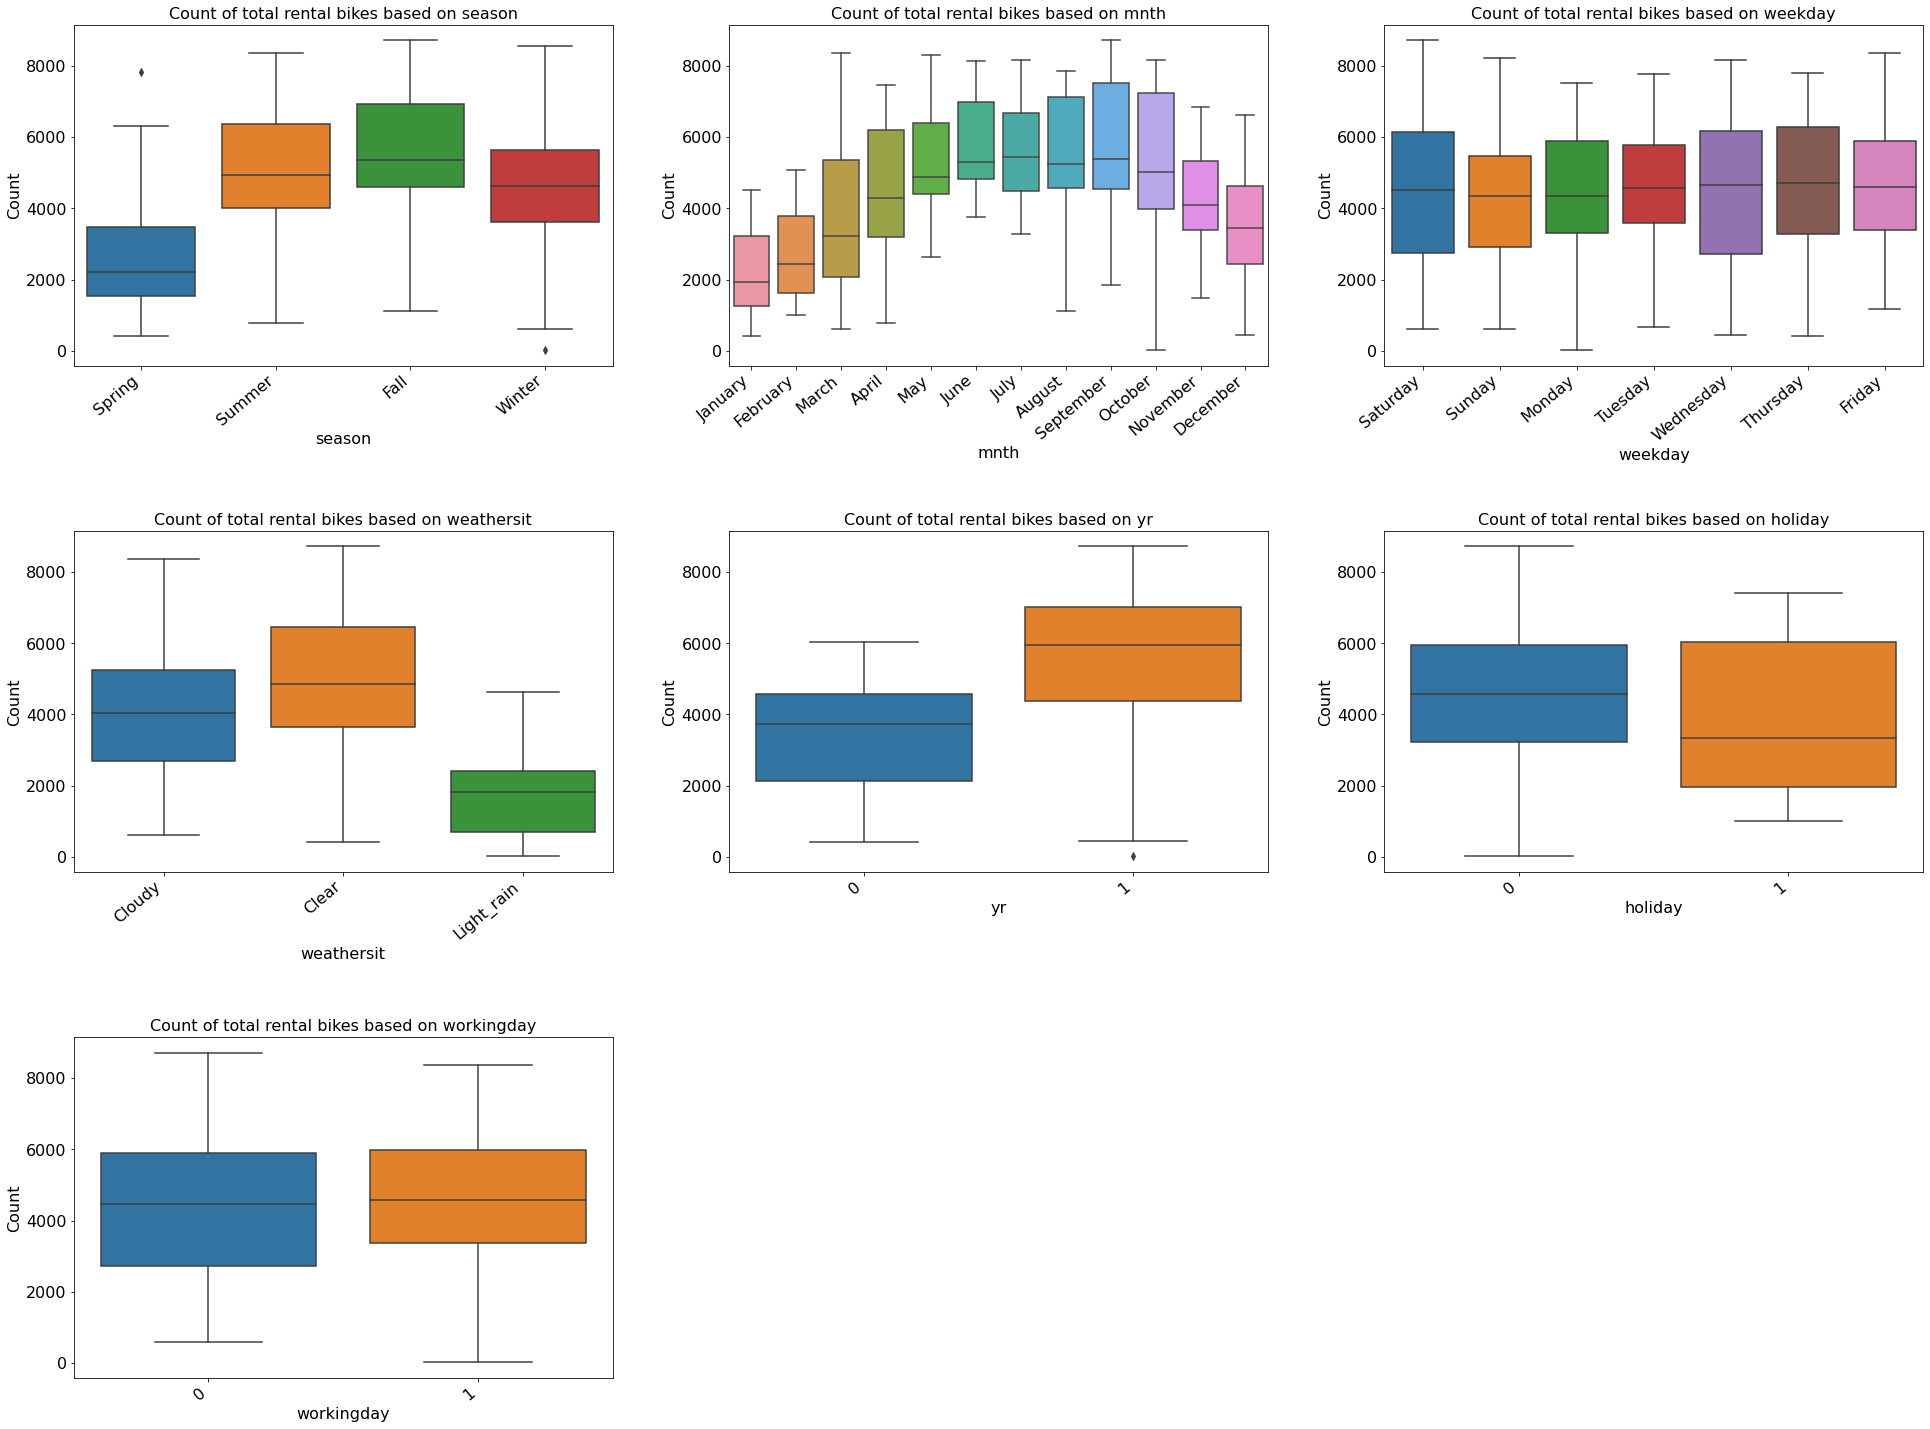

In [68]:
# Visualizing the data
plt.figure(figsize = (28,21))
for i,j in enumerate(pd.concat([df[cat_vars],df[binary_vars]], axis = 1)):
    plt.subplot(3,3,i+1)
    cat_plot(j,df)
plt.savefig('plot_cat.png')
plt.show()

#### Based on the above graphs, we have below observations:

- The most number of bikes are rented in the fall season usually , and it is also confirmed by the monthwise plot as well
- The trend for bike rentals has no significance difference day wise with the largest spread on wednesdays
- The number of bikes rented is usually higher when the days are clear, with least bikes rented in rainy season
- More number of bikes have been rented in 2019 as compared to 2018
- Usually, more bikes are rented when there is no holiday, but there is high spread in the number of bikes rented on holidays
- On average, the number of bikes hired on working days and non working days are similar, with a high spread for non working days

#### Let's check for the correlation among the data and visualise using heatmap

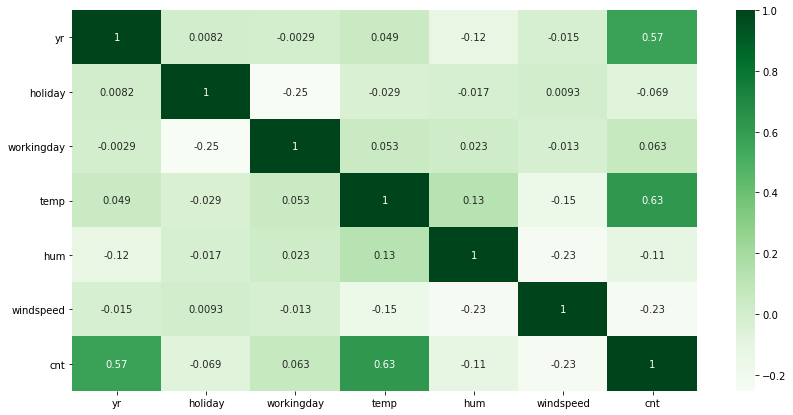

In [69]:
### Corr for data
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')
plt.show()

#### We observe that the __temp__ and __yr__ has the highest correlation with count of total rental bikes

## Step 5: Preparing the data for modelling

- Converting categorical vars to dummy
- Splitting the train and test
- Rescaling of variables

#### Look at data

In [70]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


#### The variables __season__, __mnth__, __weekday__ and __weathersit__ are categorical in nature and needs to be converted to dummy variables

#### We will create a function that will convert numeric to dummy variables

In [71]:
## Function to create dummies for data
def convert_to_dummies(data, col, drop = True):
    return pd.get_dummies(data[col], drop_first = drop)

In [72]:
## Take a backup of dataframe 
inp = df.copy()

#### Let's use above function to create dummies

#### Create dummies for __season__

In [73]:
dummy_season = convert_to_dummies(inp,'season')  

#### Create dummies for __mnth__

In [74]:
dummy_mnth = convert_to_dummies(inp,'mnth')

#### Create dummies for __weekday__

In [75]:
dummy_weekday = convert_to_dummies(inp,'weekday')

#### Create dummies for __weathersit__

In [76]:
dummy_weathersit = convert_to_dummies(inp,'weathersit')

#### Now, we will merge these with our original dataframe

In [77]:
## Merging the dummies with the original dataframe
inp = pd.concat([inp, dummy_season, dummy_mnth, dummy_weekday,dummy_weathersit], axis =1)

#### Looking at inp after concatenation

In [78]:
### Checking the data 
print(inp.shape)
inp.head().T

(730, 33)


,0,1,2,3,4
season,Spring,Spring,Spring,Spring,Spring
yr,0,0,0,0,0
mnth,January,January,January,January,January
holiday,0,0,0,0,0
weekday,Saturday,Sunday,Monday,Tuesday,Wednesday
workingday,0,0,1,1,1
weathersit,Cloudy,Cloudy,Clear,Clear,Clear
temp,14.1108,14.9026,8.05092,8.2,9.30524
hum,80.5833,69.6087,43.7273,59.0435,43.6957
windspeed,10.7499,16.6521,16.6367,10.7398,12.5223


#### The original categorical columns are an information overload and can be removed

In [79]:
## Checking the categorical variables
cat_vars

['season', 'mnth', 'weekday', 'weathersit']

#### Dropping the original values

In [80]:
## Dropping the original variables
inp = inp.drop(cat_vars, axis = 1)

#### Taking a look again

In [81]:
## Checking the data
print(inp.shape)
inp.head()

(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light_rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Now the data has 29 columns and all are of numerical type, we can proceed with further analysis

#### Train-Test Split

In [82]:
## Doing train-test split
df_train, df_test = train_test_split(inp,train_size=0.7, random_state = 100)

#### Checking the shape of train data

In [83]:
## Checking the shape of train data
print(df_train.shape)

(510, 29)


#### Checking the shape of test data

In [84]:
## Checking the shape of test data
print(df_test.shape)

(220, 29)


### Rescaling

#### The numerical data is in 4 columns __temp__, __hum__, __windspeed__ and __cnt__, we can perform rescaling on these

In [85]:
num_vars = ['temp', 'hum', 'windspeed']

#### Performing scaling

In [86]:
# 1. Initialize the scaler object
scaler = MinMaxScaler()

### Checking the columns to be scaled
df_train[num_vars]

,temp,hum,windspeed
576,29.246653,70.4167,11.083475
426,16.980847,62.1250,10.792293
728,10.489153,48.3333,23.500518
482,15.443347,48.9583,8.708325
111,13.803347,72.9583,14.707907
...,...,...,...
578,30.852500,65.9583,8.666718
53,9.091299,42.3043,6.305571
350,10.591653,56.0833,16.292189
79,17.647835,73.7391,19.348461


#### Scaling and transforming on numercial data

In [87]:
## Performing scaling and transformation
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#### Checking the dataframe

In [88]:
df_train.head(10).T

,576,426,728,482,111,580,500,479,472,455
yr,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
holiday,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
workingday,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
temp,0.815169,0.442393,0.245101,0.395666,0.345824,0.914852,0.719639,0.520271,0.503656,0.456929
hum,0.616677,0.497301,0.298740,0.307738,0.653269,0.485902,0.607679,0.218957,0.422316,0.576485
windspeed,0.357372,0.344758,0.895311,0.254475,0.514392,0.624509,0.232812,0.222015,0.364591,0.377232
cnt,7216.000000,4066.000000,1796.000000,4220.000000,1683.000000,6824.000000,7424.000000,6196.000000,4367.000000,6041.000000
Spring,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Summer,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
Winter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Step 6 : Training the model

#### Taking the dependent and independent variables for model training

In [89]:
### Defining the train and test values
y_train = df_train.pop('cnt')
X_train = df_train

In [90]:
# Checking top 5 records of dependent variable
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [91]:
# Checking the shape of train data
X_train.shape

(510, 28)

#### __Performing RFECV__ - Recursive Feature Elimination Cross Validation on data to list out features that are more significant than others

In [92]:
# Initialising LinearRegression() object
lm = LinearRegression()
# Fitting the model
lm.fit(X_train, y_train)

# Performing REECV
rfecv = RFECV(lm, step=1, cv=5)
## Fitting the model
rfecv = rfecv.fit(X_train, y_train)

#### Checking the unique values and there count

In [93]:
# Checking unique values
np.unique(rfecv.support_,return_counts = True)

(array([False,  True]), array([ 6, 22], dtype=int64))

#### Taking the count of true values

In [94]:
## Taking the count of true values 
true_values = np.unique(rfecv.support_,return_counts = True)[1][1]

In [95]:
# Checking the values
true_values

22

#### THE RFECV has given us the value 22. We will choose 22 values as suggested by RFECV for our model

#### Choosing 22 features for RFE

In [96]:
# Initialising LinearRegression() object
lm = LinearRegression()
# Fitting the model
lm.fit(X_train, y_train)

# Performing REECV
rfe = RFE(lm, true_values)
## Fitting the model
rfe = rfe.fit(X_train, y_train)

In [97]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank')
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sunday
21,1,True,Saturday
20,1,True,Monday
19,1,True,September
17,1,True,November
16,1,True,May
26,1,True,Cloudy
12,1,True,January
11,1,True,February


#### Assigning selected features to a variable

In [98]:
## Taking selected features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'August', 'December', 'February', 'January', 'July',
       'May', 'November', 'September', 'Monday', 'Saturday', 'Sunday',
       'Cloudy', 'Light_rain'],
      dtype='object')

#### Checking the variables that got eliminated from the RFE

In [99]:
## Checking dropped values
dropped_col = X_train.columns[~rfe.support_]
dropped_col

Index(['June', 'March', 'October', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object')

#### We have selected 22 columns and eliminated 6 columns for further study

#### Now, we will create functions that we will be using repeatedly to create model and calculate vif

#### Creating a function to create an __Ordinary Least Square__ Model

In [100]:
## Function to create model
def create_model(dependent,independent) : 
    X_train_sm = sm.add_constant(independent)
    lm = sm.OLS(dependent, X_train_sm).fit()
    print(lm.summary())
    return lm

#### We will create our first model on the selected features

#### Taking the selected columns in a variable

In [101]:
## Taking the selected columns in a variable
X_train_rfe = X_train[col]

#### Creating the model for above dataset

In [102]:
# Creating the model
create_model(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.1
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.15e-186
Time:                        19:17:01   Log-Likelihood:                -4100.8
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     488   BIC:                             8339.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1846.8522    258.022      7.158      0.0

#### We have got r2 and significance level. We will now check for vif

#### VIF = 1/(1-R2)

####  Creating function for calculating vif

In [103]:
## Function to calculate vif
def calculate_vif(data):
    vif = pd.DataFrame()
    df = sm.add_constant(data)
    columns = df.columns
    vif['Features'] = columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Calculating the VIF for our data

In [104]:
## Calculating the vif
calculate_vif(X_train_rfe)

      Features   VIF
20      Sunday   inf
2      holiday   inf
3   workingday   inf
19    Saturday   inf
7       Spring  8.58
8       Summer  6.60
9       Winter  6.29
4         temp  4.98
10      August  3.17
14        July  2.80
13     January  2.38
17   September  2.23
5          hum  2.11
12    February  1.87
16    November  1.84
11    December  1.67
21      Cloudy  1.65
15         May  1.52
22  Light_rain  1.36
6    windspeed  1.22
18      Monday  1.18
1           yr  1.05
0        const  0.00


#### We will use below criteria to select final features for our data

#### Criteria for variable selection:

- __High p-value - High VIF__
    - High p-value, High VIF, remove first
- __High p-value - Low VIF:__
    - High p-value, Low VIF, remove these first
    - Low p-value, High VIF, remove after the ones above
- __Low p-Value - Low VIF__
    - Low p-value, Low VIF, remove these

#### Looking at the above data, Holiday has the high p-value(0.983) and high vif(inf), we will remove it first

In [105]:
## Dropping the holiday column
col = col[col!='holiday']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.1
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.15e-186
Time:                        19:17:01   Log-Likelihood:                -4100.8
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     488   BIC:                             8339.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1842.7109    396.512      4.647      0.0

#### Calculating vif for above features

In [106]:
# Calculating VIF
calculate_vif(X_train[col])

      Features     VIF
0        const  135.91
2   workingday    9.95
6       Spring    8.58
18    Saturday    6.94
7       Summer    6.60
19      Sunday    6.55
8       Winter    6.29
3         temp    4.98
9       August    3.17
13        July    2.80
12     January    2.38
16   September    2.23
4          hum    2.11
11    February    1.87
15    November    1.84
10    December    1.67
20      Cloudy    1.65
14         May    1.52
21  Light_rain    1.36
5    windspeed    1.22
17      Monday    1.18
1           yr    1.05


#### Looking at the above date, we find that __August__ has high __p-value(0.511)__ and low __VIF(3.17)__, we will delete it now

In [107]:
## Dropping the August column
col = col[col!='August']
# Creaing the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.19e-187
Time:                        19:17:01   Log-Likelihood:                -4101.0
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     489   BIC:                             8333.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1918.3824    379.204      5.059      0.0

#### Calculating vif for above features

In [108]:
# Calculating the VIF
calculate_vif(X_train[col])

      Features     VIF
0        const  124.45
2   workingday    9.95
17    Saturday    6.93
18      Sunday    6.55
6       Spring    5.81
3         temp    4.96
8       Winter    3.90
7       Summer    3.49
11     January    2.38
4          hum    2.10
10    February    1.87
14    November    1.83
9     December    1.67
19      Cloudy    1.64
13         May    1.52
12        July    1.50
15   September    1.35
20  Light_rain    1.35
5    windspeed    1.22
16      Monday    1.18
1           yr    1.05


#### Looking at the above date, we find that __Monday__ has high __p-value(0.289)__ and low __VIF(1.18)__, we will delete it now

In [109]:
## Dropping the Monday column
col = col[col!='Monday']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.1
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.69e-188
Time:                        19:17:02   Log-Likelihood:                -4101.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     490   BIC:                             8328.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1828.6018    369.687      4.946      0.0

#### Calculating vif for above features

In [110]:
# Calculating the VIF
calculate_vif(X_train[col])

      Features     VIF
0        const  118.25
2   workingday    9.24
16    Saturday    6.18
17      Sunday    5.84
6       Spring    5.80
3         temp    4.94
8       Winter    3.89
7       Summer    3.49
11     January    2.38
4          hum    2.10
10    February    1.87
14    November    1.82
9     December    1.66
18      Cloudy    1.64
13         May    1.51
12        July    1.50
19  Light_rain    1.35
15   September    1.34
5    windspeed    1.22
1           yr    1.05


#### Looking at the above date, we find that __May__ has high __p-value(0.174)__ and low __VIF(1.51)__, we will delete it now

In [111]:
## Dropping the May column
col = col[col!='May']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          3.35e-189
Time:                        19:17:02   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     491   BIC:                             8324.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1745.8882    364.964      4.784      0.0

#### Calculating vif for above features

In [112]:
# Calculating the VIF
calculate_vif(X_train[col])

      Features     VIF
0        const  115.05
2   workingday    9.24
15    Saturday    6.18
16      Sunday    5.84
6       Spring    5.71
3         temp    4.80
8       Winter    3.87
7       Summer    2.83
11     January    2.37
4          hum    2.06
10    February    1.87
13    November    1.81
9     December    1.66
17      Cloudy    1.64
12        July    1.49
18  Light_rain    1.35
14   September    1.34
5    windspeed    1.22
1           yr    1.04


#### Looking at the above date, we find that __February__ has high __p-value(0.093)__ and low __VIF(1.87)__, we will delete it now

In [113]:
## Dropping the February column
col = col[col!='February']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.05e-189
Time:                        19:17:02   Log-Likelihood:                -4104.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     492   BIC:                             8320.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.8886    356.981      4.518      0.0

#### Calculating vif for above features

In [114]:
# Calculating the VIF
calculate_vif(X_train[col])

      Features     VIF
0        const  109.66
2   workingday    9.21
14    Saturday    6.16
15      Sunday    5.82
6       Spring    5.29
3         temp    4.50
8       Winter    3.85
7       Summer    2.78
4          hum    2.06
12    November    1.77
10     January    1.67
16      Cloudy    1.64
9     December    1.51
11        July    1.49
17  Light_rain    1.35
13   September    1.34
5    windspeed    1.22
1           yr    1.04


#### Looking at the above date, we find that __Sunday__ has low __p-value(0.058)__ and high __VIF(5.82)__, we will delete it now

In [115]:
## Dropping the Sunday column
col = col[col!='Sunday']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          4.74e-190
Time:                        19:17:03   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     493   BIC:                             8318.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2008.1148    291.034      6.900      0.0

#### Calculating vif for above features

In [116]:
# Calculating the VIF
calculate_vif(X_train[col])

      Features    VIF
0        const  72.50
6       Spring   5.28
3         temp   4.49
8       Winter   3.85
7       Summer   2.78
4          hum   2.06
12    November   1.75
10     January   1.67
2   workingday   1.66
14    Saturday   1.65
15      Cloudy   1.64
9     December   1.50
11        July   1.49
16  Light_rain   1.35
13   September   1.33
5    windspeed   1.22
1           yr   1.04


#### Looking at the above date, we find that __Spring__ has low __p-value(0.003)__ and high __VIF(5.28)__, we will delete it now

In [117]:
## Dropping the Spring column
col = col[col!='Spring']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          2.60e-189
Time:                        19:17:03   Log-Likelihood:                -4110.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     494   BIC:                             8321.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1415.3587    212.798      6.651      0.0

#### Calculating vif for above features

In [118]:
# Calculating the vif
calculate_vif(X_train[col])

      Features    VIF
0        const  38.16
3         temp   2.34
7       Winter   2.09
4          hum   2.03
11    November   1.69
2   workingday   1.66
9      January   1.66
13    Saturday   1.65
14      Cloudy   1.62
8     December   1.48
6       Summer   1.44
10        July   1.44
15  Light_rain   1.33
12   September   1.21
5    windspeed   1.20
1           yr   1.04


#### Looking at the above date, we find that __November__ has high __p-value(0.072__) and low __VIF(1.69)__, we will delete it now

In [119]:
## Dropping the November column
col = col[col!='November']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          9.20e-190
Time:                        19:17:03   Log-Likelihood:                -4112.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     495   BIC:                             8318.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1354.1237    210.537      6.432      0.0

#### Calculating vif for above features

In [120]:
# Calculating the VIF
calculate_vif(X_train[col])

      Features    VIF
0        const  37.19
3         temp   2.27
4          hum   2.02
2   workingday   1.66
12    Saturday   1.65
9      January   1.63
13      Cloudy   1.62
7       Winter   1.54
10        July   1.44
6       Summer   1.43
14  Light_rain   1.33
8     December   1.27
5    windspeed   1.20
11   September   1.20
1           yr   1.04


#### Looking at the above date, we find that __December__ has high __p-value(0.202)__ and low __VIF(1.27)__, we will delete it now

In [121]:
## Dropping the December column
col = col[col!='December']
# Creating the model
create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.41e-190
Time:                        19:17:04   Log-Likelihood:                -4112.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     496   BIC:                             8313.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1299.8376    206.333      6.300      0.0

#### Calculating vif for above features

In [122]:
## Calculating the VIF
calculate_vif(X_train[col])

      Features    VIF
0        const  35.67
3         temp   2.08
4          hum   2.00
2   workingday   1.65
11    Saturday   1.64
12      Cloudy   1.61
8      January   1.54
7       Winter   1.52
9         July   1.44
6       Summer   1.41
13  Light_rain   1.32
5    windspeed   1.19
10   September   1.19
1           yr   1.04


In [123]:
X_train[col].shape[1]

13

#### Now all the p-values are below 0.05
#### The vif values are below 5 for all features except const, 
#### We can say that these values are satisfactory, we can declare the above model as final model
#### The number of final features is __13__
#### The __adjusted R2__ for above model is __0.84__, i.e the model is able to explain __84%__ variability in the training data

#### We can take the result of above model in a variable named final_lm

In [124]:
## Taking the final model in a variable
final_lm = create_model(y_train, X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.41e-190
Time:                        19:17:04   Log-Likelihood:                -4112.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     496   BIC:                             8313.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1299.8376    206.333      6.300      0.0

### Residual Analysis

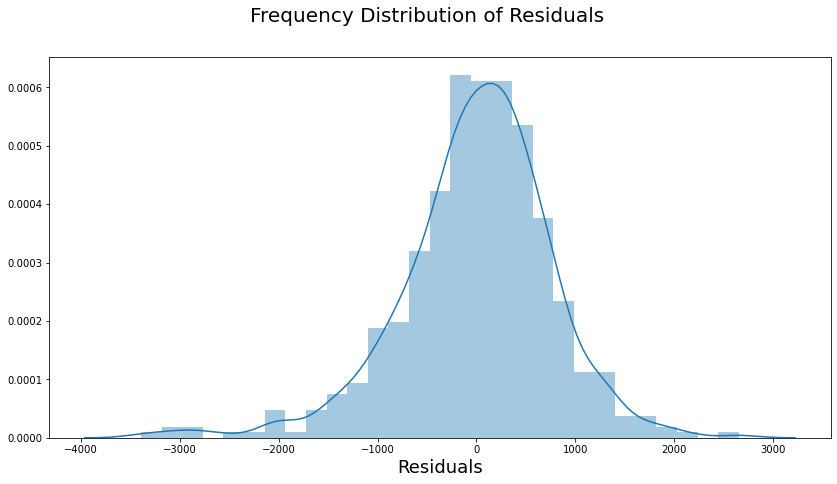

In [125]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[col])

y_train_pred = final_lm.predict(X_train_sm)

res = y_train-y_train_pred

# Plot the histogram of the residuals
fig = plt.figure(figsize = (14,7))
sns.distplot(res)
fig.suptitle('Frequency Distribution of Residuals', fontsize = 20)
plt.xlabel('Residuals', fontsize = 18)    
plt.savefig('freq_dist.png')
plt.show()

In [126]:
# Verifying the normality of distribution of residuals 
mean = res.mean()

In [127]:
## Rounding off mean
print(round(mean))

0


#### The mean of the distribution is 0

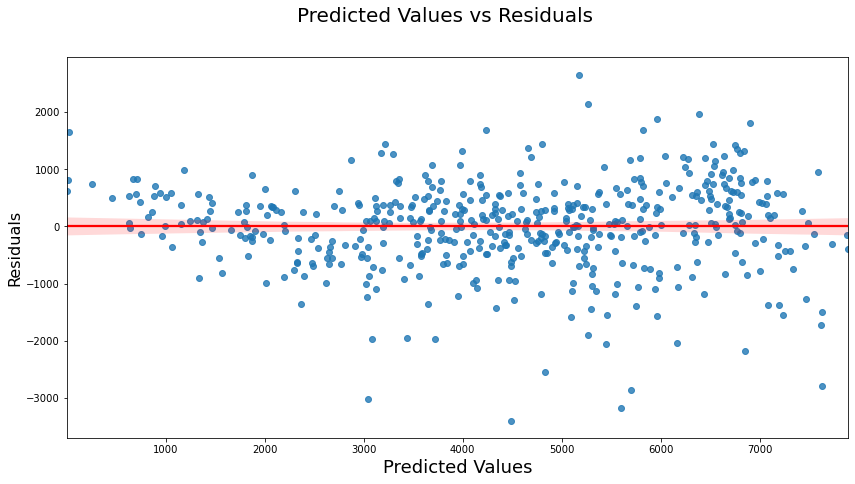

In [128]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (14,7))
sns.regplot(y_train_pred,res,line_kws={"color": "red"})
fig.suptitle('Predicted Values vs Residuals', fontsize=20)              # Plot heading 
plt.xlabel('Predicted Values', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)                          # Y-label
plt.savefig('res_plot.png')
plt.show()

#### From above two grpahs,we can see the residuals follow a normal distribution with mean 0
#### The Predicted values vs Residuals plot doesn't show any trend, i.e. the residuals are independent of each other

#### The assumptions of linear regression are satisfied

## Step 7: Making Predictions

In [129]:
## Checking the test values for numerical columns
df_test[num_vars] 

,temp,hum,windspeed
184,29.793347,63.7917,5.459106
535,32.082500,59.2083,7.625404
299,19.270000,81.2917,13.250121
221,31.433347,42.4167,13.417286
152,29.315000,30.5000,19.583229
...,...,...,...
702,19.509153,73.3750,11.666643
127,21.661653,63.1667,5.000712
640,26.957500,79.3750,4.458569
72,13.333897,49.6957,9.174042


#### Applying the scaling on the test sets

In [130]:
# Performing the scaling on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into __X_test__ and __y_test__

In [131]:
## Taking out dependent and independent variables from test data
y_test = df_test.pop('cnt')
X_test = df_test

#### Using model to make predictions on test data

In [132]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train[col].columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#### Making predictions on test data using final model

In [133]:
# Making predictions on above data
y_pred = final_lm.predict(X_test_new)

## Model Evaluation

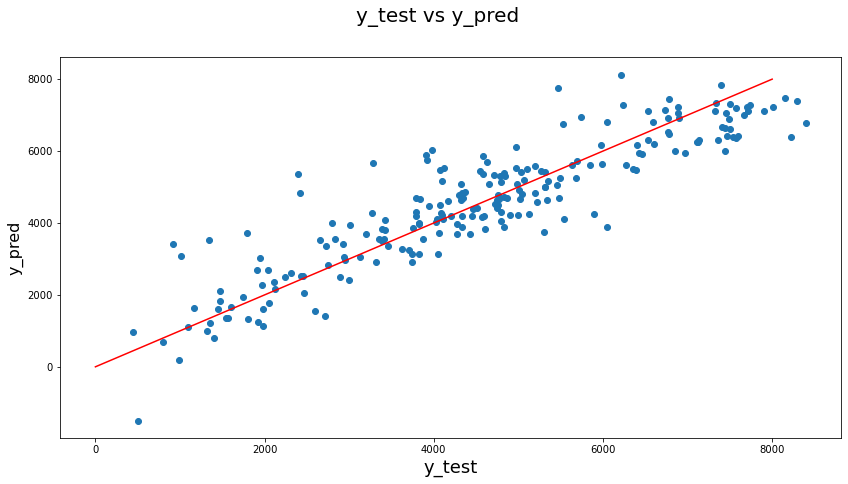

In [134]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (14,7))
plt.scatter(y_test,y_pred)
x = np.linspace(0,8000,8000)
y=x
plt.plot(x,y,'r')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### The predicted and actual values shows a good relationship

#### Checking for r2 score for test

In [135]:
r_score_test = r2_score(y_test, y_pred)

#### Checking for mean square error

In [136]:
mse = mean_squared_error(y_test, y_pred)

In [137]:
print(round(mse,2))

701864.19


#### Looking at the __r score__

In [138]:
print(round(r_score_test,2))

0.81


#### The __R2 __for test on predictions based on final model is __0.81__, i.e the model is able to explain __81%__ variability in the test data

#### Checking for numerical variables

In [139]:
df_test[num_vars]

,temp,hum,windspeed
184,0.831783,0.521296,0.113710
535,0.901354,0.455309,0.207560
299,0.511964,0.773246,0.451237
221,0.881625,0.213558,0.458479
152,0.817246,0.041992,0.725604
...,...,...,...
702,0.519232,0.659268,0.382637
127,0.584649,0.512298,0.093851
640,0.745598,0.745651,0.070364
72,0.331557,0.318355,0.274651


#### The above values are scaled using min-max scaler, we can convert back to normal values

In [140]:
### Transforming the values of test records
df_test[num_vars] = scaler.inverse_transform(df_test[num_vars])

#### The normal values are as below

In [141]:
df_test[num_vars]

,temp,hum,windspeed
184,29.793347,63.7917,5.459106
535,32.082500,59.2083,7.625404
299,19.270000,81.2917,13.250121
221,31.433347,42.4167,13.417286
152,29.315000,30.5000,19.583229
...,...,...,...
702,19.509153,73.3750,11.666643
127,21.661653,63.1667,5.000712
640,26.957500,79.3750,4.458569
72,13.333897,49.6957,9.174042


#### Looking at the numerical values and actual values, aling with predicted values

In [142]:
# Checking the numerical records on predicted data
pd.DataFrame({'Predicted cnt':round(y_pred).astype('int64')})

,Predicted cnt
184,3893
535,8127
299,3520
221,5320
152,5518
...,...
702,6202
127,4190
640,7185
72,2703


#### Looking at the test data along with predicted values

In [143]:
## Looking at the test data along with actual and predicted values
pd.concat([df_test,pd.Series(y_test),pd.DataFrame({'Predicted cnt':round(y_pred).astype('int64')})],axis =1)

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light_rain,cnt,Predicted cnt
184,0,1,0,29.793347,63.7917,5.459106,0,0,0,0,...,1,0,0,0,0,0,1,0,6043,3893
535,1,0,1,32.082500,59.2083,7.625404,0,1,0,0,...,0,0,0,0,0,1,0,0,6211,8127
299,0,0,1,19.270000,81.2917,13.250121,0,0,1,0,...,0,0,0,1,0,0,1,0,2659,3520
221,0,0,1,31.433347,42.4167,13.417286,0,0,0,1,...,0,0,0,0,0,1,0,0,4780,5320
152,0,0,1,29.315000,30.5000,19.583229,0,1,0,0,...,0,0,0,1,0,0,0,0,4968,5518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,73.3750,11.666643,0,0,1,0,...,0,0,0,0,1,0,0,0,6606,6202
127,0,0,0,21.661653,63.1667,5.000712,0,1,0,0,...,0,0,1,0,0,0,0,0,4333,4190
640,1,0,1,26.957500,79.3750,4.458569,0,0,1,0,...,0,0,0,0,0,1,1,0,7572,7185
72,0,0,1,13.333897,49.6957,9.174042,1,0,0,0,...,1,0,0,0,0,0,0,0,2046,2703


#### Visualizing actual and predicted together

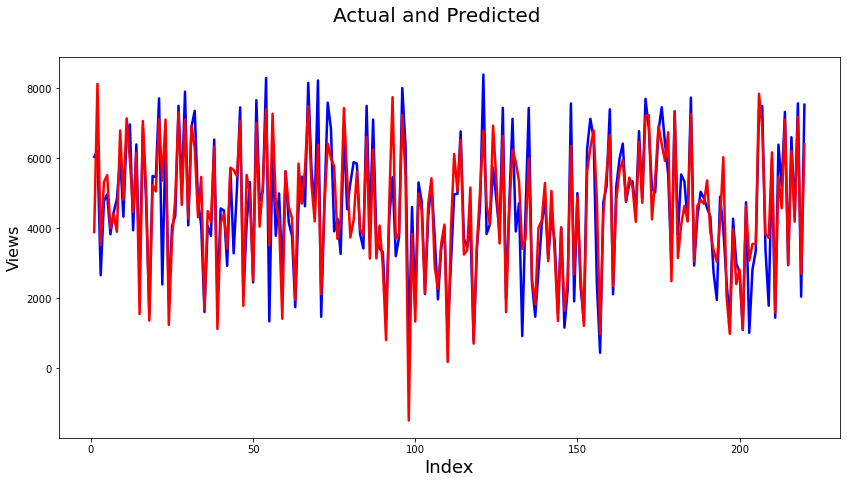

In [144]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize = (14,7))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label
plt.show()

#### The actual and predicted variables are overlapping for most data points

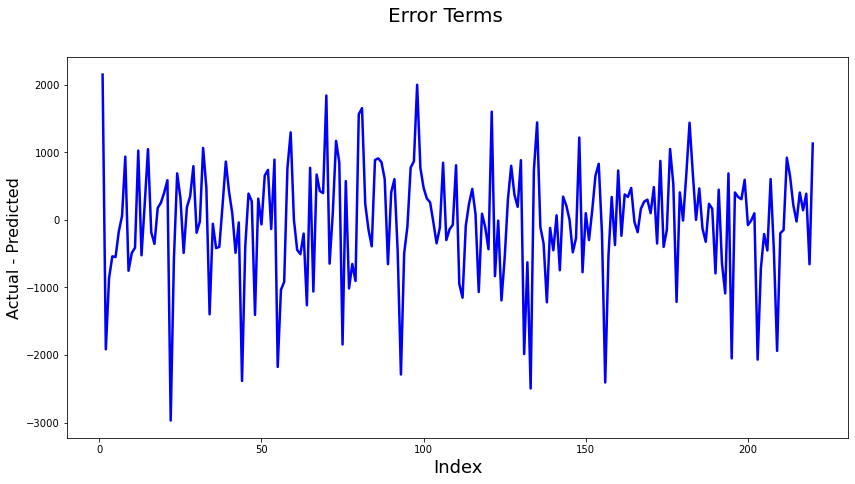

In [145]:
# Error terms
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize = (14,7))
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual - Predicted', fontsize=16)         # Y-label
plt.show()

## Conclusion

#### Using RFECV on data, we found __22__ columns with highest support, so we run RFE to find out the top __22__ values. After that we manually dropped 9 columns on the basis of p-value and VIF and we got 13 columns

#### After that we divided the data into __train__ and __test__ dataset

#### `Final Model` built on training data set explains __84%__ of the variability and  achieves __81%__ r- square on test data.  

#### The final relationship between demand and predictors is as follows.    


* ```cnt``` = 1299.8376 + ```yr``` * 1987.1375 + ```workingday``` * 456.8617 + ```temp``` * 4973.2402 + ```hum``` * -1107.1241 + ```windspeed``` * -1276.2591 + ```Summer``` * 669.5508 + ```Winter``` * 1093.7103 + ```January``` * -340.8706 + ```July ``` * -376.6116 + ```September``` * 793.9936 + ```Saturday``` * 536.3872 + ```Cloudy``` * -444.8616 + ```Light_rain``` * -2023.8345

* We can say that the count has a positive relationship with yr, workingday, temp, Summer, Winter, September and Saturday. On increasing any of these values, the cnt will increase

* The count has a negative relationship with hum, windspeed, January, July, Cloudy and Light_rain. On increasing any of these values, the cnt will decrease

## Recommendations

#### The temperature has the highest positive coefficient, i.e. there is an increase in the number of bikes rented with increase in temperature, so we can keep enough stocks in the summer season.
#### The __Light_rain__ season has the highest negative coefficient, i.e. there is a decrease in the number of bikes rented when there os more of rain and snow, so it would be a good idea to offer raincoat along with the bikes
